In [1]:
import sys
import numpy as np
sys.path.insert(1,'../python_source/')
from chiphifunc import *
from math_utilities import *
from chiphiepsfunc import *
from chiphifunc_test_suite import *
import time
# for debugging

Detected 16 CPU's. Setting n_jobs to #CPU/2.


# Testing special cases (Works!)

In [4]:
a = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [4,5,6],
    [1,2,3],
])

a2 = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [4,5,6],
])

b = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
])

b2 = np.array([
    [1,2,3],
    [4,5,6],
])

c = np.array([
    [10],
    [20],
    [30],
])

r = np.array([
    [10,100,1000],
])

g = np.array([
    [10,100,1000,10000],
])

test_even_a = ChiPhiFunc(a, 4)
test_odd_a = ChiPhiFunc(a2, 4)
test_even_b = ChiPhiFunc(b, 4)
test_odd_b = ChiPhiFunc(b2, 4)
single_col = ChiPhiFunc(c, 4)
single_row = ChiPhiFunc(r, 4)
wrong_grid = ChiPhiFunc(g, 4)
test_odd_a_wrong_nfp = ChiPhiFunc(a, 2)
test_even_a_wrong_nfp = ChiPhiFunc(a2, 2)
zero = ChiPhiFuncSpecial(0)
out_of_bound = ChiPhiFuncSpecial(-1)
null_a = ChiPhiFuncSpecial(-2)
null_b = ChiPhiFuncSpecial(-3)
print('even+even:', not (test_even_a+test_even_b).is_special)
print('odd+odd:', not (test_odd_a+test_odd_b).is_special)
print('even+const', not (test_even_a+1).is_special)
print('even+row', not (test_even_a+single_row).is_special)
print('even+odd = error -4:', (test_odd_a+test_even_b).nfp==-4)
print('odd+row = error -4:', (test_odd_a+single_row).nfp==-4)
print('ChiPhiFunc(*, <= 0, False) = error -2:', ChiPhiFunc(a, -1).nfp==-2)
print('zero+even = even', (test_even_a+zero).nfp>0 and not (test_even_a+zero).is_special)
print('even+zero = even', (zero+test_even_a).nfp>0 and not (zero+test_even_a).is_special)
print('zero+zero = zero', (zero+zero).nfp==0)
print('zero+error = error', (zero+null_a).nfp==-2)
print('error+zero = error', (null_a+zero).nfp==-2)
print('error a+error b = error ab', (null_a+null_b).nfp==-203)
print('Testing products -----')
print('even*even:', (test_even_a*test_even_b).content.shape[0]==7)
print('even*const', (test_even_a*2).content.shape[0]==5)
print('zero*const', (test_even_a*zero).nfp==0)
print('zero*even = zero', (test_even_a*zero).nfp==0)
print('even*zero = zero', (zero*test_even_a).nfp==0)
print('zero*zero = zero', (zero*zero).nfp==0)
print('zero*error = error', (zero*null_a).nfp==-2)
print('error*zero = error', (null_a*zero).nfp==-2)
print('out of bound*zero = zero', (out_of_bound*zero).nfp==0)
print('zero*out of bound = zero', (zero*out_of_bound).nfp==0)
print('error a*error b = error ab', (null_a*null_b).nfp==-203)
print('Testing division -----')
print('even/even:', (test_even_a/test_even_b).is_special)
print('even/const', (test_even_a/2).content.shape[0]==5)
print('const/even:', (2/test_even_b).is_special)
print('even/row:', not (test_even_a/single_row).is_special)
print('const/row:', not (2/single_row).is_special)
print('const/zero:', (2/zero).nfp==-8)
print('zero/const:', (zero/2).nfp==0)
print('even/zero:', (test_even_a/zero).nfp==-8)
print('zero/even:', (zero/test_even_a).nfp==0)
print('error a/error b = error ab', (null_a/null_b).nfp)

even+even: True
odd+odd: True
even+const True
even+row True
even+odd = error -4: True
odd+row = error -4: True
ChiPhiFunc(*, <= 0, False) = error -2: True
zero+even = even True
even+zero = even True
zero+zero = zero True
zero+error = error True
error+zero = error True
error a+error b = error ab True
Testing products -----
even*even: True
even*const True
zero*const True
zero*even = zero True
even*zero = zero True
zero*zero = zero True
zero*error = error True
error*zero = error True
out of bound*zero = zero True
zero*out of bound = zero True
error a*error b = error ab True
Testing division -----
even/even: True
even/const True
const/even: True
even/row: True
const/row: True
const/zero: True
zero/const: True
even/zero: True
zero/even: True
error a/error b = error ab -3


# Testing display_content() (Works!)

In [5]:
content_single_nfp = np.array([
    jnp.sin(4*points), # sin component
    jnp.cos(4*points) # cos component
])
content1 = np.array([
    jnp.sin(points), # sin component
    jnp.cos(points) # cos component
])
single_period = ChiPhiFunc(content_single_nfp, 1, fourier_mode=True)
four_period = ChiPhiFunc(content1, nfp=4, fourier_mode=True)


In [4]:
four_period+1

A


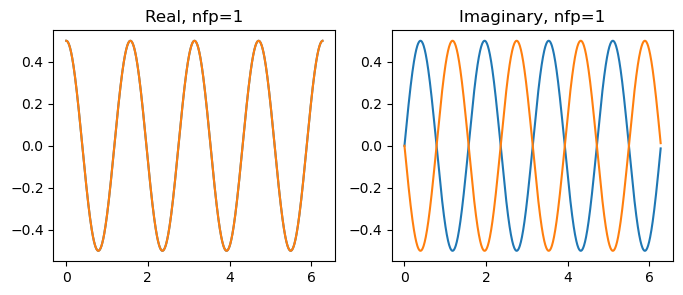

B


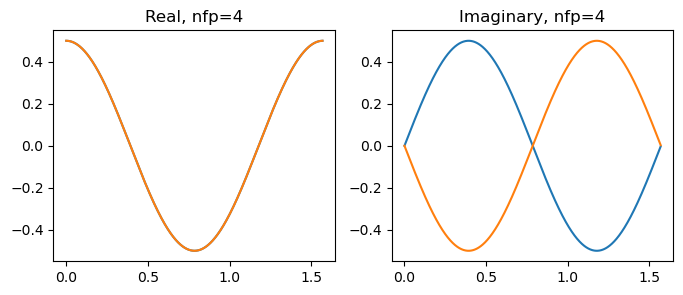

One of A and B is converted to have nfp=1.
A.nfp = 1
B.nfp = 4
A


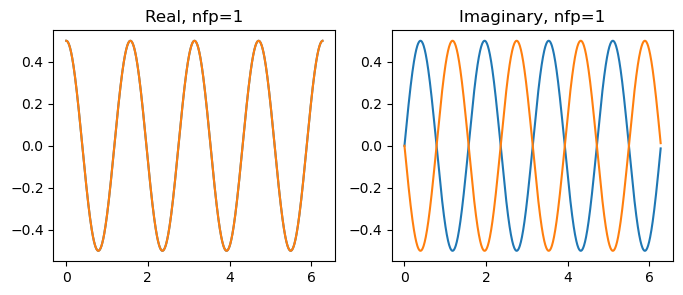

B


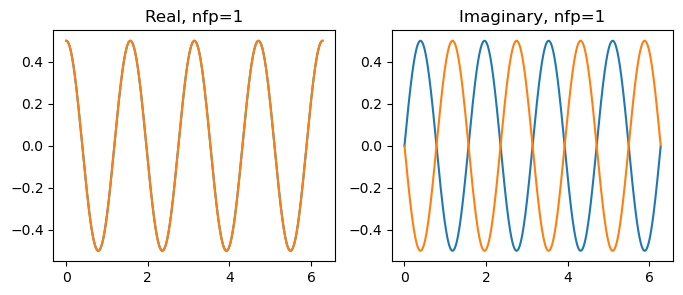

Phi grid number not matched.


()

In [5]:

compare_chiphifunc(single_period, four_period, simple_mode=False)

# Defining test variables

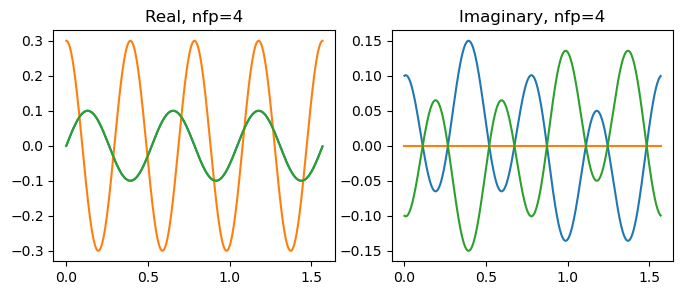

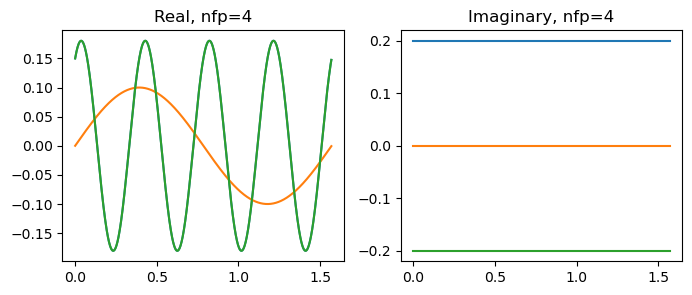

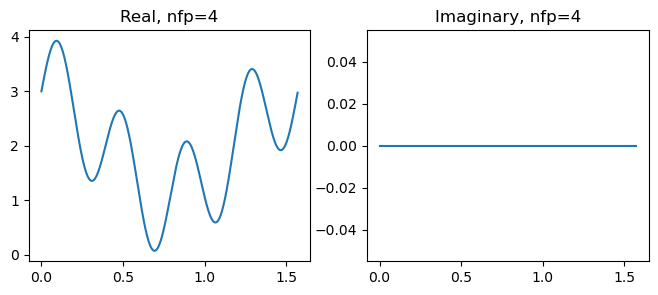

In [2]:
# Generating 2 random test cases and answers
nfp = np.random.randint(4)+2

# Creating 2 random ChiPhiFunc's for testing
rands1 = np.random.randint(5, size=12)
func1 = np.vectorize(lambda chi, phi : \
    (rands1[0]/10*np.sin(rands1[1]*nfp*phi) + rands1[2]/10*np.cos(rands1[3]*nfp*phi))*np.sin(2*chi)+\
    rands1[4]/10*np.sin(rands1[5]*nfp*phi) + rands1[6]/10*np.cos(rands1[7]*nfp*phi)+\
    (rands1[8]/10*np.sin(rands1[9]*nfp*phi) + rands1[10]/10*np.cos(rands1[11]*nfp*phi))*np.cos(2*chi))

content1 = np.array([
    rands1[0]/10*np.sin(rands1[1]*points) + rands1[2]/10*np.cos(rands1[3]*points),
    rands1[4]/10*np.sin(rands1[5]*points) + rands1[6]/10*np.cos(rands1[7]*points),
    rands1[8]/10*np.sin(rands1[9]*points) + rands1[10]/10*np.cos(rands1[11]*points)
])


rands2 = np.random.randint(5, size=12)
func2 = np.vectorize(lambda chi, phi : \
    (rands2[0]/10*np.sin(rands2[1]*nfp*phi) + rands2[2]/10*np.cos(rands2[3]*nfp*phi))*np.sin(2*chi)+\
    rands2[4]/10*np.sin(rands2[5]*nfp*phi) + rands2[6]/10*np.cos(rands2[7]*nfp*phi)+\
    (rands2[8]/10*np.sin(rands2[9]*nfp*phi) + rands2[10]/10*np.cos(rands2[11]*nfp*phi))*np.cos(2*chi))
content2 = np.array([
    rands2[0]/10*np.sin(rands2[1]*points) + rands2[2]/10*np.cos(rands2[3]*points),
    rands2[4]/10*np.sin(rands2[5]*points) + rands2[6]/10*np.cos(rands2[7]*points),
    rands2[8]/10*np.sin(rands2[9]*points) + rands2[10]/10*np.cos(rands2[11]*points)
])

randsodd = np.random.randint(5, size=16)
funcodd = np.vectorize(lambda chi, phi : \
    (randsodd[0]/10*np.sin(randsodd[1]*nfp*phi) + randsodd[2]/10*np.cos(randsodd[3]*nfp*phi))*np.sin(3*chi)+\
    (randsodd[4]/10*np.sin(randsodd[5]*nfp*phi) + randsodd[6]/10*np.cos(randsodd[7]*nfp*phi))*np.sin(1*chi)+\
    (randsodd[8]/10*np.sin(randsodd[9]*nfp*phi) + randsodd[10]/10*np.cos(randsodd[11]*nfp*phi))*np.cos(1*chi)+\
    (randsodd[12]/10*np.sin(randsodd[13]*nfp*phi) + randsodd[14]/10*np.cos(randsodd[15]*nfp*phi))*np.cos(3*chi))
contentodd = np.array([
    randsodd[0]/10*np.sin(randsodd[1]*points) + randsodd[2]/10*np.cos(randsodd[3]*points),
    randsodd[4]/10*np.sin(randsodd[5]*points) + randsodd[6]/10*np.cos(randsodd[7]*points),
    randsodd[8]/10*np.sin(randsodd[9]*points) + randsodd[10]/10*np.cos(randsodd[11]*points),
    randsodd[12]/10*np.sin(randsodd[13]*points) + randsodd[14]/10*np.cos(randsodd[15]*points)
])


rands3 = np.random.randint(low=1, high=5, size=2)
func_no_chi = np.vectorize(lambda chi, phi : 
    np.sin(rands3[0]*nfp*phi) + np.cos(rands3[1]*nfp*phi)+2)
content_no_chi = np.array([
    np.sin(rands3[0]*points) + np.cos(rands3[1]*points) + 2
])
test1 = ChiPhiFunc(content1, nfp, fourier_mode = True)
test2 = ChiPhiFunc(content2, nfp, fourier_mode = True)
testodd = ChiPhiFunc(contentodd, nfp, fourier_mode = True)
test_no_chi = ChiPhiFunc(content_no_chi, nfp, fourier_mode = True)

# plt.pcolormesh(chi, phi, func1_result)
# plt.show()
test1.display_content()
test2.display_content()
test_no_chi.display_content()

In [3]:
funcodd_result = evaluate(funcodd)
func1_result = evaluate(func1)
func2_result = evaluate(func2)
func_no_chi_result = evaluate(func_no_chi)

# Testing basic operations (Works!)

In [4]:
testodd.get_lambda()

<function chiphifunc.ChiPhiFunc.get_lambda.<locals>.<lambda>(chi, phi)>

In [5]:
print('Testing lambda:') # Works!
print_fractional_error(evaluate_ChiPhiFunc(testodd), (funcodd_result))

Testing lambda:
Error type:     Fractional      Total          
Avg:            1.89e+02        1.962e-07      
Worst:          9.448e+07       1.460e-06      
Std             1.336e+05       1.885e-07      
Total imaginary component
0.0



In [7]:
print('Testing +:')
print('Odd-odd:')
print_fractional_error(evaluate_ChiPhiFunc(testodd+testodd), (funcodd_result+funcodd_result))
print('Even-even:')
print_fractional_error(evaluate_ChiPhiFunc(test1+test2+1), (func1_result+func2_result+1))

print('Testing -:')
print_fractional_error(evaluate_ChiPhiFunc(test1-test2-test_no_chi), (func1_result-func2_result-func_no_chi_result))

print('Testing *:')
print('Odd-odd:')
print_fractional_error(evaluate_ChiPhiFunc(testodd*testodd), (funcodd_result*funcodd_result))
print('Even-even:')
print_fractional_error(evaluate_ChiPhiFunc(test1*test2), (func1_result*func2_result))
print('Even-odd:')
print_fractional_error(evaluate_ChiPhiFunc(test1*testodd), (func1_result*funcodd_result))

print('Testing /:')
print('Even:')
print_fractional_error(evaluate_ChiPhiFunc(test1/(test_no_chi+10)), (func1_result/(func_no_chi_result+10)))
print('Odd:')
print_fractional_error(evaluate_ChiPhiFunc(testodd/(test_no_chi+10)), (funcodd_result/(func_no_chi_result+10)))


print('Testing **:')
print_fractional_error(evaluate_ChiPhiFunc(test1**3), (func1_result*func1_result*func1_result))
print_fractional_error(evaluate_ChiPhiFunc(testodd**3), (funcodd_result*funcodd_result*funcodd_result))


Testing +:
Odd-odd:
Error type:     Fractional      Total          
Avg:            1.89e+02        3.924e-07      
Worst:          9.448e+07       2.921e-06      
Std             1.336e+05       3.771e-07      
Total imaginary component
0.0

Even-even:
Error type:     Fractional      Total          
Avg:            3.035e-07       2.654e-07      
Worst:          4.259e-06       2.027e-06      
Std             3.833e-07       2.944e-07      
Total imaginary component
0.0

Testing -:
Error type:     Fractional      Total          
Avg:            1.324e-06       7.263e-07      
Worst:          1.95e-02        3.457e-06      
Std             4.993e-05       6.861e-07      
Total imaginary component
0.0

Testing *:
Odd-odd:
Error type:     Fractional      Total          
Avg:            3.153e+18       1.298e-07      
Worst:          1.173e+24       1.55e-06       
Std             inf             1.503e-07      
Total imaginary component
0.0

Even-even:


/Users/lanke/anaconda3/envs/nae/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/lanke/anaconda3/envs/nae/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Error type:     Fractional      Total          
Avg:            1.688e-05       7.818e-08      
Worst:          2.002e-01       6.817e-07      
Std             8.508e-04       9.319e-08      
Total imaginary component
0.0

Even-odd:
Error type:     Fractional      Total          
Avg:            1.142e+02       9.348e-08      
Worst:          4.724e+07       9.984e-07      
Std             6.824e+04       1.141e-07      
Total imaginary component
0.0

Testing /:
Even:
Error type:     Fractional      Total          
Avg:            8.788e-06       1.741e-08      
Worst:          1.639e-01       1.128e-07      
Std             5.865e-04       1.942e-08      
Total imaginary component
0.0

Odd:
Error type:     Fractional      Total          
Avg:            4.831e+02       1.661e-08      
Worst:          1.648e+08       1.285e-07      
Std             2.571e+05       1.597e-08      
Total imaginary component
0.0

Testing **:
Error type:     Fractional      Total          
Avg:            

/Users/lanke/anaconda3/envs/nae/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Basic operations, cumulative Error

# Testing differential and integral (Works!)

## $\partial_\chi$ and $\int d\chi$ (Works!)

Testing dchi and ichi (even)
dchi
Difference


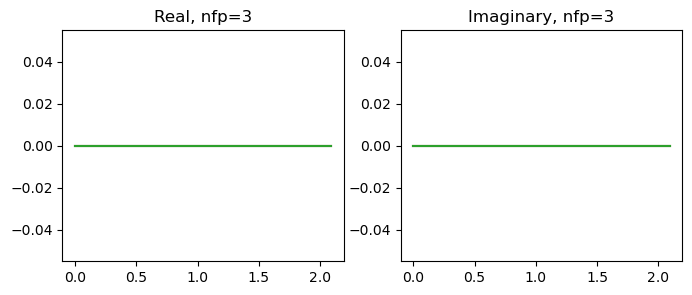

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            nan             0.e+00         
Worst:          0.e+00          0.e+00         
Std             nan             0.e+00         
Total imaginary component
0.0

ichi
Difference


/Users/lanke/Desktop/Second year project/Code JAX/apes/examples/../python_source/chiphifunc_test_suite.py:171: RuntimeWarning: invalid value encountered in divide
  frac = np.abs((guess-ans)/ans)


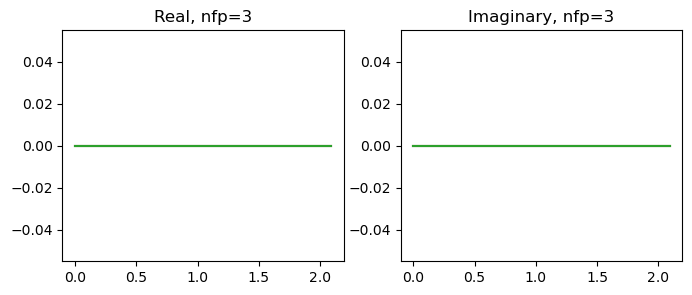

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            nan             0.e+00         
Worst:          0.e+00          0.e+00         
Std             nan             0.e+00         
Total imaginary component
0.0



In [2]:
nfp = np.random.randint(4)+2
print('Testing dchi and ichi (even)')
rands_i = np.random.randint(1,5, size=12)
amp=0.2
test1 = amp*ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points),
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)
]), nfp, fourier_mode = True)

test1_int = amp*ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.zeros_like(points, dtype=np.complex128),
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)
]), nfp, fourier_mode = True)

dchi_test1 = amp*ChiPhiFunc(np.array([
        -2*(np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)), 
        np.zeros_like(points, dtype=np.complex128),
        2*(np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points))
]), nfp, fourier_mode = True)

guess_dchi = diff(test1,'chi',1)
guess_ichi = dchi_test1.antid_chi()
print('dchi')
compare_chiphifunc(guess_dchi, dchi_test1)
print('ichi')
compare_chiphifunc(guess_ichi, test1_int)

Testing dchi and ichi (odd)
dchi
Difference


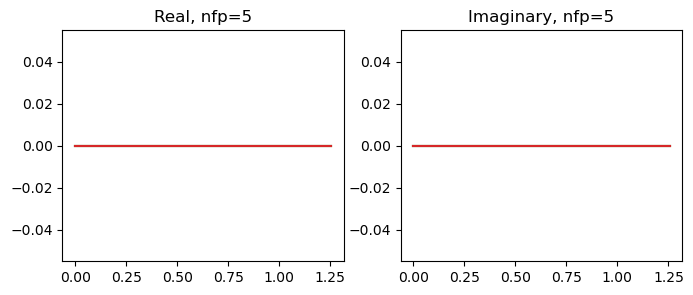

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            0.e+00          0.e+00         
Worst:          0.e+00          0.e+00         
Std             0.e+00          0.e+00         
Total imaginary component
0.0

ichi
Difference


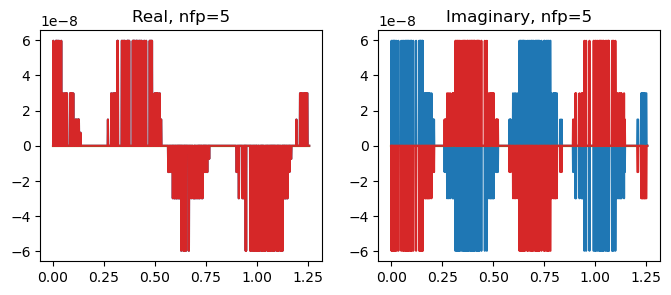

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            1.274e-08       9.118e-09      
Worst:          1.192e-07       8.429e-08      
Std             2.711e-08       2.042e-08      
Total imaginary component
0.0



In [4]:
print('Testing dchi and ichi (odd)')
nfp = np.random.randint(4)+2
rands_i = np.random.randint(1,5, size=12)

test1 = ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points), 
        np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points), 
        np.sin(rands_i[6]*points)+np.cos(rands_i[7]*points)
]), nfp, fourier_mode = True)

dchi_test1 = ChiPhiFunc(np.array([
        -3*(np.sin(rands_i[6]*points)+np.cos(rands_i[7]*points)), 
        -(np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points)), 
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points), 
        3*(np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points))
]), nfp, fourier_mode = True)

guess_dchi = diff(test1,'chi',1)
guess_ichi = dchi_test1.antid_chi()
print('dchi')
compare_chiphifunc(guess_dchi, dchi_test1)
print('ichi')
compare_chiphifunc(guess_ichi, test1, fourier_mode = False)

## $\partial_\phi$ and $\int d\phi$ (Works!)

In [8]:
nfp = np.random.randint(4)+2
rands_i = np.random.randint(1,5, size=12)
test_diff = ChiPhiFunc(np.array([
        -1/rands_i[0]*np.cos(rands_i[0]*points) + 1/rands_i[1]*np.sin(rands_i[1]*points) +1/rands_i[0]*np.cos(0),
        -1/rands_i[2]*np.cos(rands_i[2]*points) + 1/rands_i[3]*np.sin(rands_i[3]*points) +1/rands_i[2]*np.cos(0)
]), nfp, fourier_mode = True)

ans = ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)
]), nfp, fourier_mode = True)*nfp
''' 
chiphifunc.dphi_op_pseudospectral_known MUST BE MANUALLY SET 
before using pseudo-spectral.
'''
chiphifunc.dphi_op_pseudospectral_known = dphi_op_pseudospectral(test_diff.content.shape[1])

Testing dphi
Current derivative modes: 1
dphi based on FFT
Difference


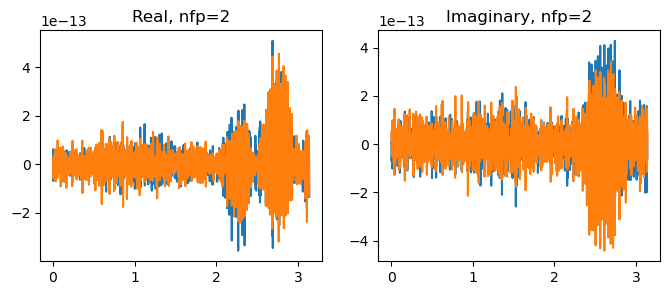

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             9.43e-14       
Worst:          inf             6.537e-13      
Std             nan             7.683e-14      
Total imaginary component
0.0

dphi based on pseudo-spectral
Difference


/Users/lanke/Desktop/Second year project/Code JAX/apes/examples/../python_source/chiphifunc_test_suite.py:171: RuntimeWarning: divide by zero encountered in divide
  frac = np.abs((guess-ans)/ans)
/Users/lanke/anaconda3/envs/nae/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


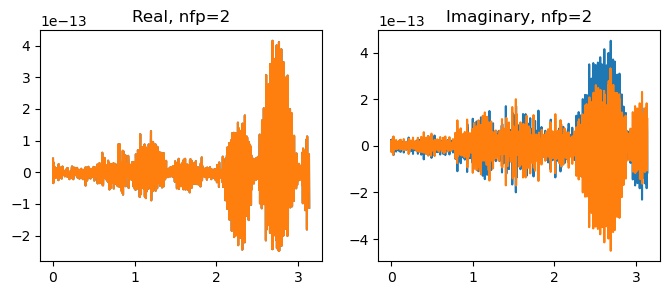

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             7.347e-14      
Worst:          inf             6.129e-13      
Std             nan             7.993e-14      
Total imaginary component
0.0



In [9]:
print('Testing dphi')
print('Current derivative modes:', chiphifunc.diff_mode)

print('dphi based on FFT')
guess_fft = test_diff.dphi(mode=1)
compare_chiphifunc(guess_fft, ans)

print('dphi based on pseudo-spectral')
guess_pseudo_spectral = test_diff.dphi(mode=2)
compare_chiphifunc(guess_pseudo_spectral, ans)


In [ ]:
print('Testing integrate_phi')
amp=0.2
nfp = np.random.randint(4)+2

rands_i = np.random.randint(1,10, size=12)
test_integral = amp*ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points), 
        np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points)
]),nfp, fourier_mode = True)

ans = amp*ChiPhiFunc(np.array([
        -1/rands_i[0]*np.cos(rands_i[0]*points) + 1/rands_i[1]*np.sin(rands_i[1]*points) +1/rands_i[0],
        -1/rands_i[2]*np.cos(rands_i[2]*points) + 1/rands_i[3]*np.sin(rands_i[3]*points) +1/rands_i[2],
        -1/rands_i[4]*np.cos(rands_i[4]*points) + 1/rands_i[5]*np.sin(rands_i[5]*points) +1/rands_i[4]
]), nfp, fourier_mode = True)/nfp


ans_2pi = amp*ChiPhiFunc(np.array([
        [-1/rands_i[0]*np.cos(rands_i[0]*2*np.pi) + 1/rands_i[1]*np.sin(rands_i[1]*2*np.pi) +1/rands_i[0]*np.cos(0)],
        [-1/rands_i[2]*np.cos(rands_i[2]*2*np.pi) + 1/rands_i[3]*np.sin(rands_i[3]*2*np.pi) +1/rands_i[2]*np.cos(0)],
        [-1/rands_i[4]*np.cos(rands_i[4]*2*np.pi) + 1/rands_i[5]*np.sin(rands_i[5]*2*np.pi) +1/rands_i[4]*np.cos(0)]
]), nfp, fourier_mode = True)/nfp

In [12]:

# print('Testing periodic: simpson')
# guess = test_integral.integrate_phi(periodic=False, zero_avg=False, mode='simpson')
# print('Testing periodic: spline')
# print_fractional_error(test_integral.integrate_phi(periodic=True, zero_avg=None, mode = 'spline').content,ans_2pi.content)

print('Testing general')
guess = test_integral.integrate_phi_fft(zero_avg=False)

# print('Simpson v. ans')
# compare_chiphifunc(guess, ans, fourier_mode = False)
# print('Spline v. ans')
# compare_chiphifunc(guess_spline, ans, fourier_mode = False)
print('FFT v. ans')
compare_chiphifunc(guess_fft, ans)


Testing general


AttributeError: 'bool' object has no attribute 'ndim'

In [5]:
a = np.array([[1,2],[3,4]])
a[:,0][:,None]

array([[1],
       [3]])

## `diff()` (Works!)

Testing diff()
dphi fft
Error type:     Fractional      Total          
Avg:            1.588e-13       5.082e-12      
Worst:          5.729e-10       4.485e-11      
Std             3.440e-12       6.409e-12      
Total imaginary component
0.0

This is  the naive implementation. Please implement periodic spline with scipy.interpolate.splrep
dphi spline
Error type:     Fractional      Total          
Avg:            4.699e-06       3.218e-04      
Worst:          6.469e-03       6.171e-02      
Std             5.521e-05       3.072e-03      
Total imaginary component
0.0

dphi finite_difference


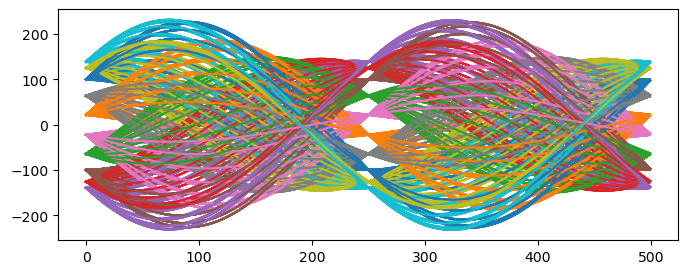

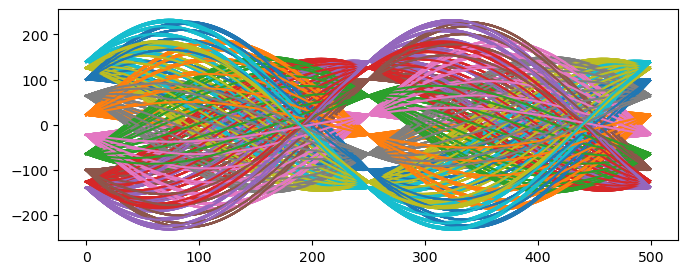

Error type:     Fractional      Total          
Avg:            3.284e-03       2.306e-01      
Worst:          1.951e+00       6.628e-01      
Std             1.638e-02       1.504e-01      
Total imaginary component
0.0

Testing dchi on chi phi array (for testing recursion relations)
dchi
Error type:     Fractional      Total          
Avg:            0.e+00          0.e+00         
Worst:          0.e+00          0.e+00         
Std             0.e+00          0.e+00         
Total imaginary component
0.0



In [9]:
print('Testing diff()')
rands_i = np.random.randint(20,22, size=12)
test_diff = ChiPhiFunc(np.array([
        np.cos(rands_i[0]*points) + np.sin(rands_i[1]*points) +1/rands_i[0]*np.cos(0),
        np.cos(rands_i[2]*points) + np.sin(rands_i[3]*points) +1/rands_i[2]*np.cos(0)
]), nfp, fourier_mode = True)

ans = ChiPhiFunc(np.array([
        -rands_i[0]*np.sin(rands_i[0]*points)+rands_i[1]*np.cos(rands_i[1]*points), 
        -rands_i[2]*np.sin(rands_i[2]*points)+rands_i[3]*np.cos(rands_i[3]*points)
]), nfp, fourier_mode = True)*nfp
guess = diff(test_diff,'phi',1)
guess_fft = test_diff.dphi(mode = 'fft', order = 1)
print('dphi fft')
print_fractional_error(evaluate_ChiPhiFunc(guess_fft), evaluate_ChiPhiFunc(ans))
guess_spline = test_diff.dphi(mode = 'spline', order = 1)
print('dphi spline')
print_fractional_error(evaluate_ChiPhiFunc(guess_spline), evaluate_ChiPhiFunc(ans))
guess_finite_difference = test_diff.dphi(mode = 'finite_difference', order = 1)
print('dphi finite_difference')
print_fractional_error(evaluate_ChiPhiFunc(guess_finite_difference), evaluate_ChiPhiFunc(ans))

print('Testing dchi on chi phi array (for testing recursion relations)')
rands_i = np.random.randint(1,5, size=12)
a = np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points) 
b = np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)
c = np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points) 
d = np.sin(rands_i[6]*points)+np.cos(rands_i[7]*points) 
e = np.sin(rands_i[8]*points)+np.cos(rands_i[9]*points)
test_diff = ChiPhiFunc(np.array([a,b,c,d,e]), nfp, fourier_mode = True)

ans = ChiPhiFunc(np.array([-4*e,-2*d,np.zeros_like(c),2*b,4*a]), nfp, fourier_mode = True)

guess = diff(test_diff,'chi',1)
print('dchi')
print_fractional_error(evaluate_ChiPhiFunc(guess), evaluate_ChiPhiFunc(ans))

# Testing $\phi$ ODE solvers (Works, except spline is slightly non-periodic)

In [2]:
# Creating 2 random ChiPhiFunc's for testing
rands1 = np.random.randint(5, size=16)

content1 = np.array([
    rands1[0]/10*np.sin(rands1[1]*points) + rands1[2]/10*np.cos(rands1[3]*points),
    rands1[4]/10*np.sin(rands1[5]*points) + rands1[6]/10*np.cos(rands1[7]*points),
    rands1[8]/10*np.sin(rands1[9]*points) + rands1[10]/10*np.cos(rands1[11]*points),
    rands1[12]/10*np.sin(rands1[13]*points) + rands1[14]/10*np.cos(rands1[15]*points)
])
test1 = ChiPhiFunc(content1, 1, fourier_mode = True)
iota = np.random.rand()# rational: np.random.randint(1,5)/np.random.randint(1,5)
# dphi + iota*dchi
dphi_test1 = ChiPhiFunc(np.array([
    rands1[1]*rands1[0]/10*np.cos(rands1[1]*points) - rands1[3]*rands1[2]/10*np.sin(rands1[3]*points),
    rands1[5]*rands1[4]/10*np.cos(rands1[5]*points) - rands1[7]*rands1[6]/10*np.sin(rands1[7]*points),
    rands1[9]*rands1[8]/10*np.cos(rands1[9]*points) - rands1[11]*rands1[10]/10*np.sin(rands1[11]*points),
    rands1[13]*rands1[12]/10*np.cos(rands1[13]*points) - rands1[15]*rands1[14]/10*np.sin(rands1[15]*points)
]), 1, fourier_mode = True)

dchi_test1 = ChiPhiFunc(np.array([
    -3*(rands1[12]/10*np.sin(rands1[13]*points) + rands1[14]/10*np.cos(rands1[15]*points)),
    -(rands1[8]/10*np.sin(rands1[9]*points) + rands1[10]/10*np.cos(rands1[11]*points)),
    rands1[4]/10*np.sin(rands1[5]*points) + rands1[6]/10*np.cos(rands1[7]*points),
    3*(rands1[0]/10*np.sin(rands1[1]*points) + rands1[2]/10*np.cos(rands1[3]*points))
]), 1, fourier_mode = True)


Testing general integrating factor
integral_mode is asymptotic
Batch asymptotic time(s): 0.022869110107421875
Difference


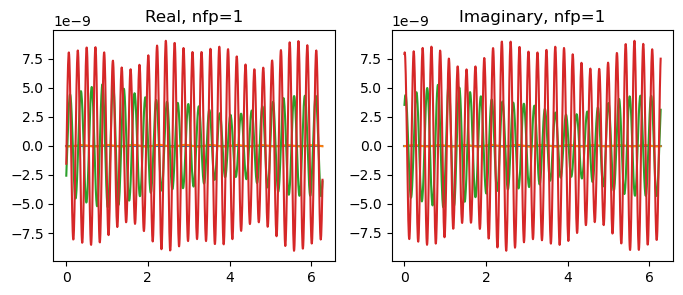

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             1.912e-09      
Worst:          inf             9.030e-09      
Std             nan             2.532e-09      
Total imaginary component
0.0

integral_mode is fft
Batch fft time(s): 0.0050280094146728516
Difference


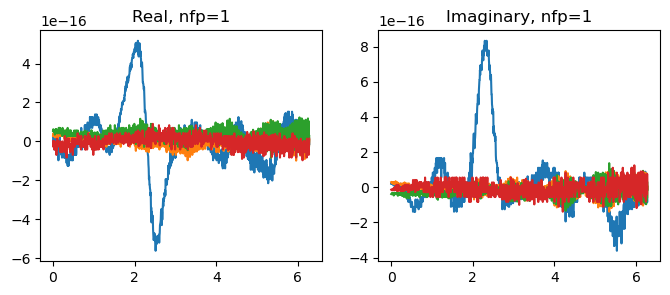

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             5.005e-17      
Worst:          inf             5.621e-16      
Std             nan             7.605e-17      
Total imaginary component
0.0

integral_mode is spline
This is  the naive implementation. Please implement periodic spline with scipy.interpolate.splrep
This is  the naive implementation. Please implement periodic spline with scipy.interpolate.splrep
Batch spline time(s): 0.020598173141479492
Difference


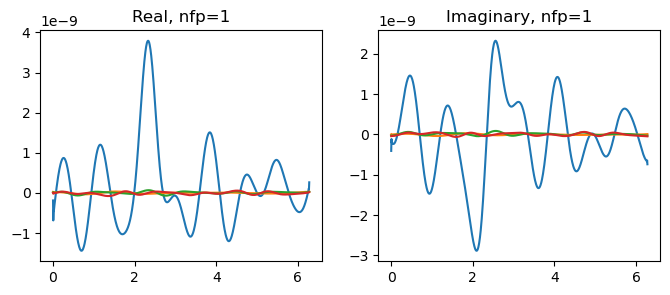

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             2.038e-10      
Worst:          inf             3.791e-09      
Std             nan             4.866e-10      
Total imaginary component
0.0

integral_mode is spline
This is  the naive implementation. Please implement periodic spline with scipy.interpolate.splrep
This is  the naive implementation. Please implement periodic spline with scipy.interpolate.splrep
Batch double-spline time(s): 0.014597892761230469
Difference


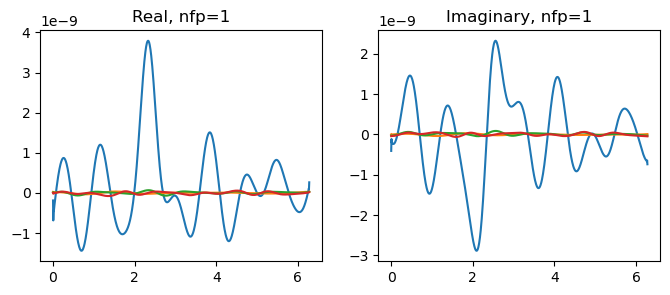

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             2.038e-10      
Worst:          inf             3.791e-09      
Std             nan             4.866e-10      
Total imaginary component
0.0

Modes: ['asymptotic', 'fft', 'fft', 'fft']
solve_integration_factor: not all components use the same integral_mode. Solving each component individially
integral_mode is fft
integral_mode is asymptotic
integral_mode is fft
integral_mode is fft
individual time(s): 0.03760504722595215
Difference


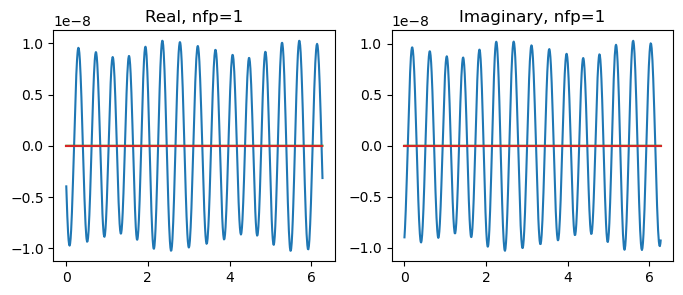

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             1.511e-09      
Worst:          inf             1.025e-08      
Std             nan             3.003e-09      
Total imaginary component
0.0



In [8]:
print('Testing general integrating factor')
# By trying different amplitudes above, the theeshold of 
# instability seems to be 17.
start_time = time.time()
a = 100*np.array([5*np.e**(2j*points),
              np.e**(1j*points), 
              np.e**(3j*points), 
              np.e**(4j*points)], dtype = np.complex128)+0.5
b = 1
RHS = a*test1.content+b*dphi_test1.content
guess_batch_asymp = solve_integration_factor(a,b,RHS,integral_mode='asymptotic')
print("Batch asymptotic time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_batch_asymp,1),test1)

# By trying different amplitudes above, the theeshold of 
# instability seems to be 17.
start_time = time.time()
a = 1*np.array([5*np.e**(2j*points),
              np.e**(1j*points), 
              np.e**(3j*points), 
              np.e**(4j*points)], dtype = np.complex128)+0.5
b = 1
RHS = a*test1.content+b*dphi_test1.content
guess_batch_asymp = solve_integration_factor(a,b,RHS,integral_mode='fft', fft_max_freq=50)
print("Batch fft time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_batch_asymp,1),test1)

# By trying different amplitudes above, the theeshold of 
# instability seems to be 17.
start_time = time.time()
RHS = a*test1.content+b*dphi_test1.content
guess_batch_asymp = solve_integration_factor(a,b,RHS,integral_mode='spline')
print("Batch spline time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_batch_asymp,1),test1)

start_time = time.time()
RHS = a*test1.content+b*dphi_test1.content
guess_batch_int = solve_integration_factor(a,b,RHS,integral_mode='spline')
print("Batch double-spline time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_batch_int,1),test1)

start_time = time.time()
a = np.array([50*np.e**(2j*points),
              np.e**(1j*points), 
              20*np.e**(3j*points), 
              np.e**(4j*points)], dtype = np.complex128)+0.5
b = 1
RHS = a*test1.content+b*dphi_test1.content
guess_ind = solve_integration_factor(a,b,RHS, fft_max_freq=50)
print("individual time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_ind,1),test1)



Testing solve_dphi_iota_dchi
Simpson mode
integral_mode is simpson
Difference


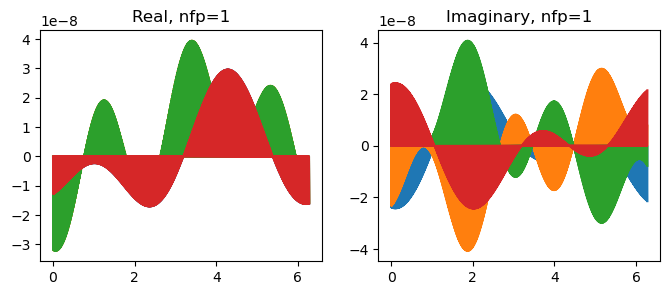

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             7.199e-09      
Worst:          inf             3.942e-08      
Std             nan             9.818e-09      
Total imaginary component
0.0



In [11]:
print('Testing solve_dphi_iota_dchi')

print('Simpson mode')
test1_guess = solve_dphi_iota_dchi(iota, (dphi_test1+iota*dchi_test1).content, integral_mode = 'simpson')
compare_chiphifunc(ChiPhiFunc(test1_guess,1),test1)

# Testing $(A+B\partial_\chi)y=b$ linear system solver (Works!)

In [15]:
# Generating coefficients
nfp = 5
coef_A = rand_ChiPhiFunc(2,nfp)
coef_B = rand_ChiPhiFunc(2,nfp)
coef_C = rand_ChiPhiFunc(3,nfp)

## Odd with center as free component

Difference


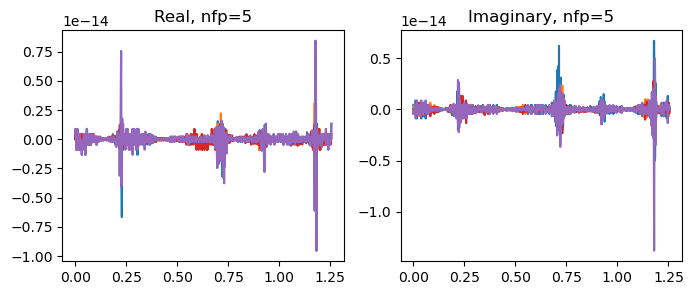

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            8.788e-04       1.952e-16      
Worst:          2.314e+00       9.548e-15      
Std             4.026e-02       4.837e-16      
Total imaginary component
0.0



In [17]:
test_Y = rand_ChiPhiFunc(5, nfp)
RHS = coef_A*test_Y+coef_B*test_Y.dchi()

O_matrices, O_einv, vector_free_coef, Y_nfp = \
    ChiPhiFunc.get_O_O_einv_from_A_B(coef_A, coef_B, 2, 4)

guess_Y_content = (np.einsum('ijk,jk->ik',O_einv,RHS.content) + test_Y[0].content[0] * vector_free_coef)
compare_chiphifunc(ChiPhiFunc(guess_Y_content, nfp), test_Y)

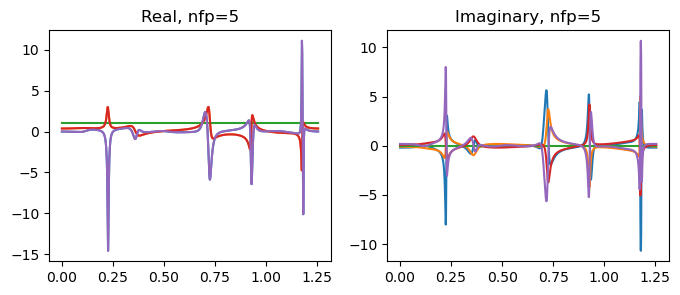

In [19]:
ChiPhiFunc(vector_free_coef, nfp).display_content()

## Even with $m=+1$ as free component

Difference


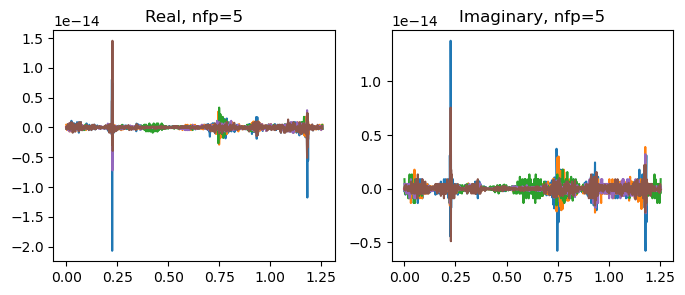

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            1.505e-15       1.801e-16      
Worst:          9.155e-13       2.071e-14      
Std             2.006e-14       4.999e-16      
Total imaginary component
0.0



In [22]:
test_Y = rand_ChiPhiFunc(6, nfp)
RHS = coef_A*test_Y+coef_B*test_Y.dchi()

O_matrices, O_einv, vector_free_coef, Y_nfp = \
    ChiPhiFunc.get_O_O_einv_from_A_B(coef_A, coef_B, 3, 5)

guess_Y_content = (np.einsum('ijk,jk->ik',O_einv,RHS.content) + test_Y[1].content[0] * vector_free_coef)
compare_chiphifunc(ChiPhiFunc(guess_Y_content, Y_nfp), test_Y)

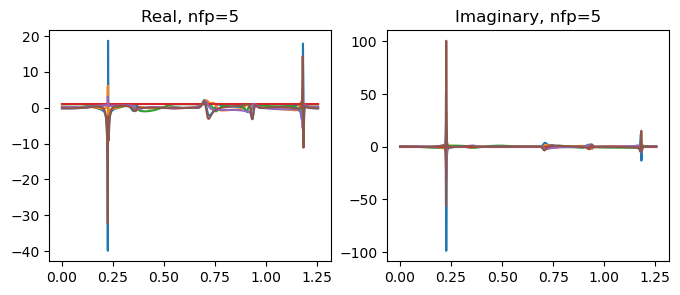

In [23]:
ChiPhiFunc(vector_free_coef, Y_nfp).display_content(fourier_mode=False)

In [46]:
test_Y = rand_ChiPhiFunc(6)
RHS = coef_A*test_Y+coef_B*test_Y.dchi()

i_1p = 3
i_1n = 2

O_matrices, O_einv, vector_free_coef = \
    ChiPhiFunc.get_O_O_einv_from_A_B(coef_A, coef_B, i_1p, 5)


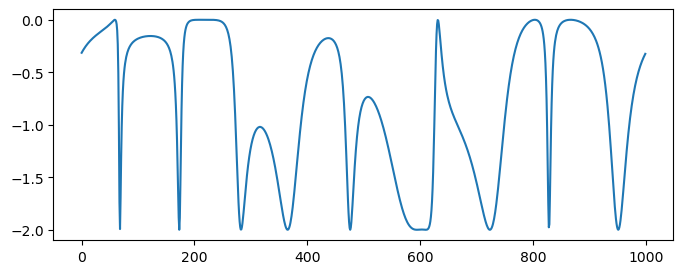

In [47]:
plt.plot(vector_free_coef[i_1n]-1)


In [48]:

vec_free = (np.einsum('ik,ik->k',O_einv[i_1n],RHS.content) + (test_Y[1]+test_Y[-1]).content[0])/(vector_free_coef[i_1n]-1)



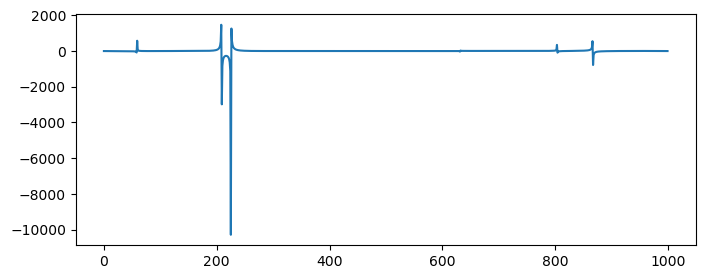

In [49]:
plt.plot(vec_free)

In [ ]:

guess_Y_content = (np.einsum('ijk,jk->ik',O_einv,RHS.content) + test_Y[1].content[0] * vector_free_coef)
compare_chiphifunc(ChiPhiFunc(guess_Y_content), test_Y)